In [691]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [692]:
# 1
df = pd.read_csv('train (3).csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [693]:
# 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [694]:
# 2
df.shape

(1460, 81)

In [695]:
# 3
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [696]:
# # 4
# df = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
#         'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'Neighborhood', ]]
# df.shape

In [697]:
# 5
df.to_csv('data_clean.csv', index=False)

In [698]:
# 6
count_nei = df['Neighborhood'].nunique()
print(f'Количество уникалных районов (Neighborhood): {count_nei}')

Количество уникалных районов (Neighborhood): 25


In [699]:
# 7
mean_nei = df.groupby('Neighborhood')['SalePrice'].mean().round(2).sort_values(ascending=False)
mean_nei.head()

,SalePrice
Neighborhood,
NoRidge,335295.32
NridgHt,316270.62
StoneBr,310499.00
Timber,242247.45
Veenker,238772.73


In [700]:
# 8
count_house_after_2000 = (df['YearBuilt'] > 2000).sum()
print(f'Количество домов было построено после 2000 года: {count_house_after_2000}')

Количество домов было построено после 2000 года: 364


In [701]:
# 9
df.groupby('OverallQual')['GrLivArea'].mean().round(2)

,GrLivArea
OverallQual,
1,619.00
2,572.67
3,1119.15
4,1106.67
5,1250.75
6,1465.87
7,1703.83
8,1947.61
9,2077.51


In [702]:
# 10
count_with_0 = (df['TotalBsmtSF'] == 0).sum()
print(f'Количуество домов с нулевым подвалом: {count_with_0}')

Количуество домов с нулевым подвалом: 37


In [703]:
total_bsmt = df['TotalBsmtSF'].shape[0]
answer = round(count_with_0 * 100 / total_bsmt,1)
print(f'Доля домов с нулевым подвалом: {answer}%')

Доля домов с нулевым подвалом: 2.5%


In [704]:
# 11
df.groupby('GarageCars')['SalePrice'].mean().round(2)

,SalePrice
GarageCars,
0,103317.28
1,128116.69
2,183851.66
3,309636.12
4,192655.80


In [705]:
# 12
total_bath = (df['FullBath'] > 2).sum()
print(f'Количество домов имеют 2+ ванных комнат: {total_bath}')

Количество домов имеют 2+ ванных комнат: 33


In [706]:
# 13
df['Neighborhood'].value_counts().head(1)

,count
Neighborhood,
NAmes,225


In [707]:
# 14
corr_cols = df[['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars', 'SalePrice']].corr()
corr_cols

,GrLivArea,TotalBsmtSF,OverallQual,GarageCars,SalePrice
GrLivArea,1.000000,0.454868,0.593007,0.467247,0.708624
TotalBsmtSF,0.454868,1.000000,0.537808,0.434585,0.613581
OverallQual,0.593007,0.537808,1.000000,0.600671,0.790982
GarageCars,0.467247,0.434585,0.600671,1.000000,0.640409
SalePrice,0.708624,0.613581,0.790982,0.640409,1.000000


In [708]:
# 15
# new_df = df.groupby('Neighborhood')['SalePrice'].mean().round(2).sort_values(ascending=False)
# new_df.to_csv('rating_neighborhood.csv')

In [709]:
# 16
std_area = np.std(df['GrLivArea'])
std_bsmt = np.std(df['TotalBsmtSF'])

median_area = np.median(df['GrLivArea'])
median_bsmt = np.median(df['TotalBsmtSF'])

print(f'Стандартное отклонение GrLivArea: {std_area}')
print(f'Стандартное отклонение TotalBsmtSF: {std_bsmt}')

print(f'Медиана GrLicArea: {median_area}')
print(f'Медиана TotalBsmtSF: {median_bsmt}')

Стандартное отклонение GrLivArea: 525.3003935623229
Стандартное отклонение TotalBsmtSF: 438.5550571748912
Медиана GrLicArea: 1464.0
Медиана TotalBsmtSF: 991.5


In [710]:
# 17
gr_mean = np.mean(df['GrLivArea'])
gr_std = np.std(df['GrLivArea'])
df['GrLivArea_z'] = (df['GrLivArea'] - gr_mean) / gr_std
df['GrLivArea_z']

,GrLivArea_z
0,0.370333
1,-0.482512
2,0.515013
3,0.383659
4,1.299326
...,...
1455,0.250402
1456,1.061367
1457,1.569647
1458,-0.832788


In [711]:
# 18
df[df['GrLivArea_z'] > 1.5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GrLivArea_z
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,New,Partial,345000,1.539188
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,New,Partial,325300,1.638179
35,36,60,RL,108.0,13418,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Normal,309000,1.782859
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,NaN,0,10,2006,New,Partial,438780,2.721369
65,66,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,317000,1.822836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,50,RM,60.0,8520,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,GdWo,NaN,0,8,2007,CWD,Family,136000,1.923730
1395,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,281213,1.839969
1417,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2009,WD,Normal,340000,1.779051
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,191000,1.978937


In [712]:
# 19
price_mean = df['SalePrice'].mean()
price_std = df['SalePrice'].std()
in_range = df[(df['SalePrice'] >= price_mean - price_std) & (df['SalePrice'] <= price_mean + price_std)]
len(in_range)

1145

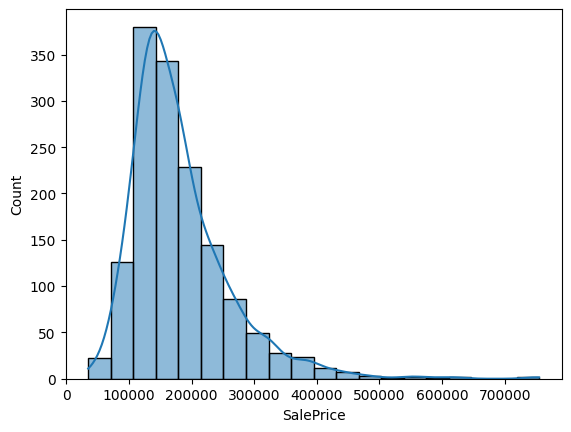

In [713]:
# 20
sns.histplot(df['SalePrice'], kde=True, bins=20)
plt.show()

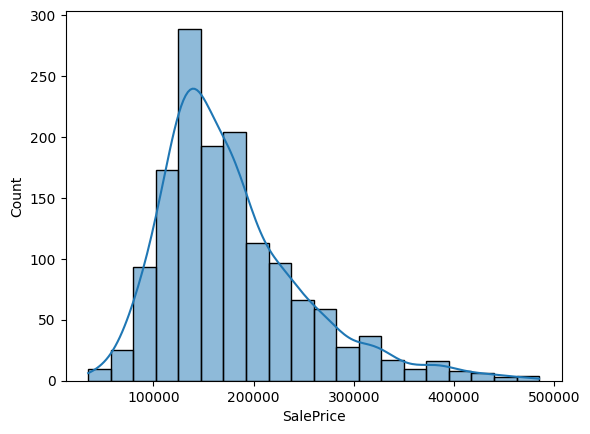

In [714]:
# 20
sns.histplot(df[df['SalePrice'] < 500000]['SalePrice'], kde=True, bins=20)
plt.show()

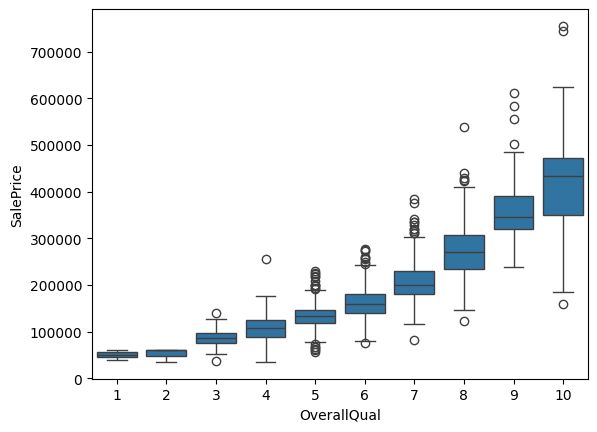

In [715]:
# 21
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

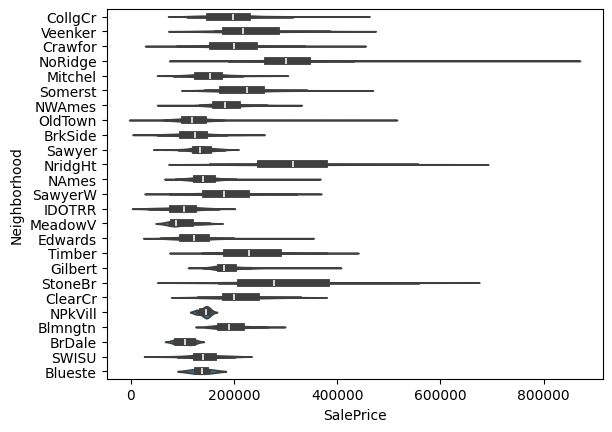

In [716]:
# 22
sns.violinplot(y='Neighborhood', x='SalePrice', data=df)
plt.show()

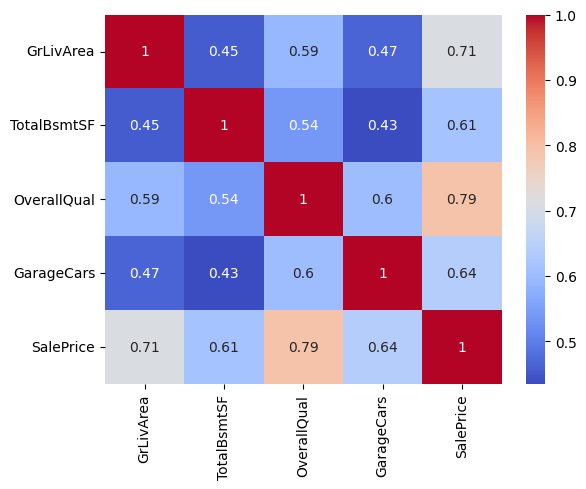

In [717]:
# 23
sns.heatmap(corr_cols, annot=True, cmap='coolwarm')
plt.show()

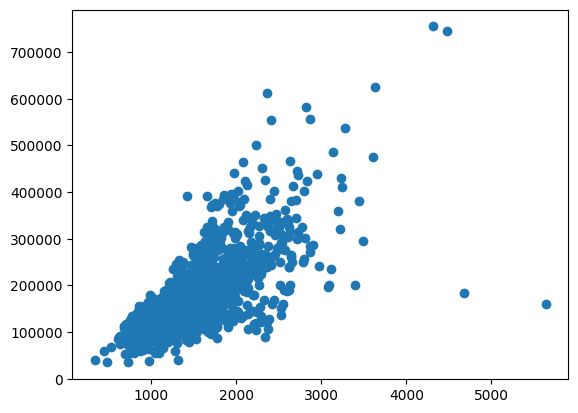

In [718]:
# 24
plt.scatter(x='GrLivArea', y='SalePrice', data=df)
plt.show()

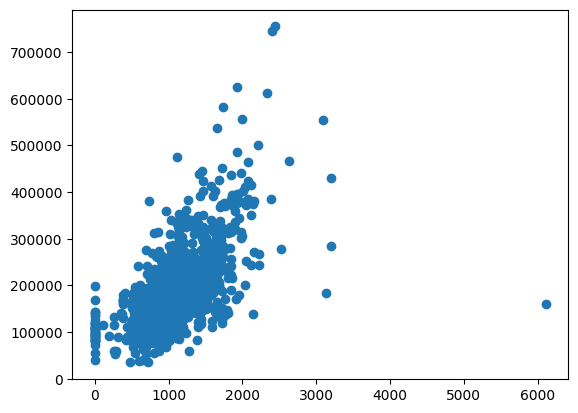

In [719]:
# 24
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

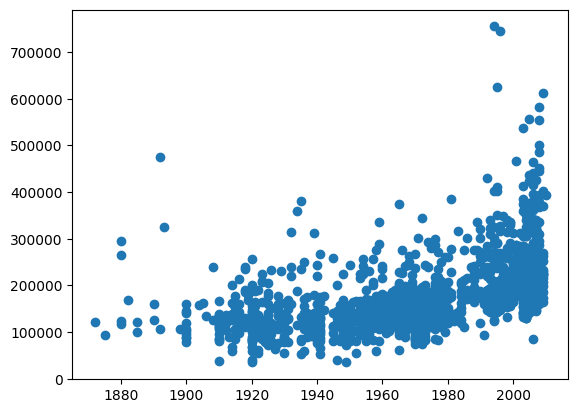

In [720]:
# 24
plt.scatter(x='YearBuilt', y='SalePrice', data=df)
plt.show()

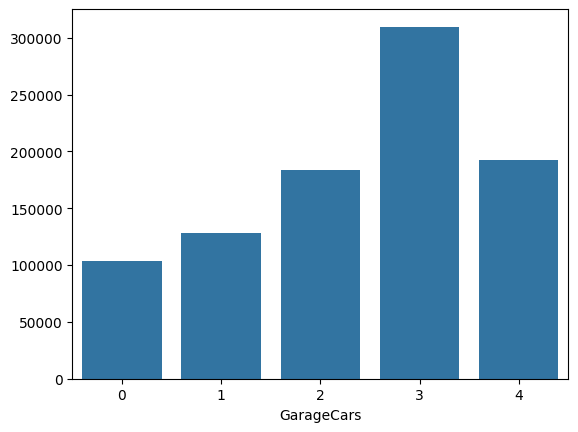

In [721]:
# 25
garage_mean = df.groupby('GarageCars')['SalePrice'].mean()
sns.barplot(x=garage_mean.index, y=garage_mean.values)
plt.show()

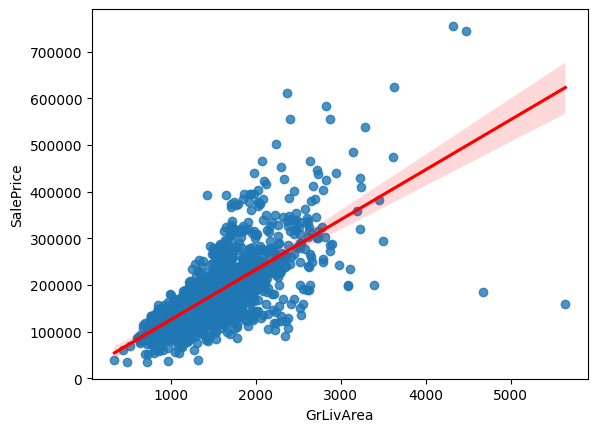

In [722]:
# 26
sns.regplot(x='GrLivArea', y='SalePrice', data=df, line_kws={'color': 'red'})
plt.show()

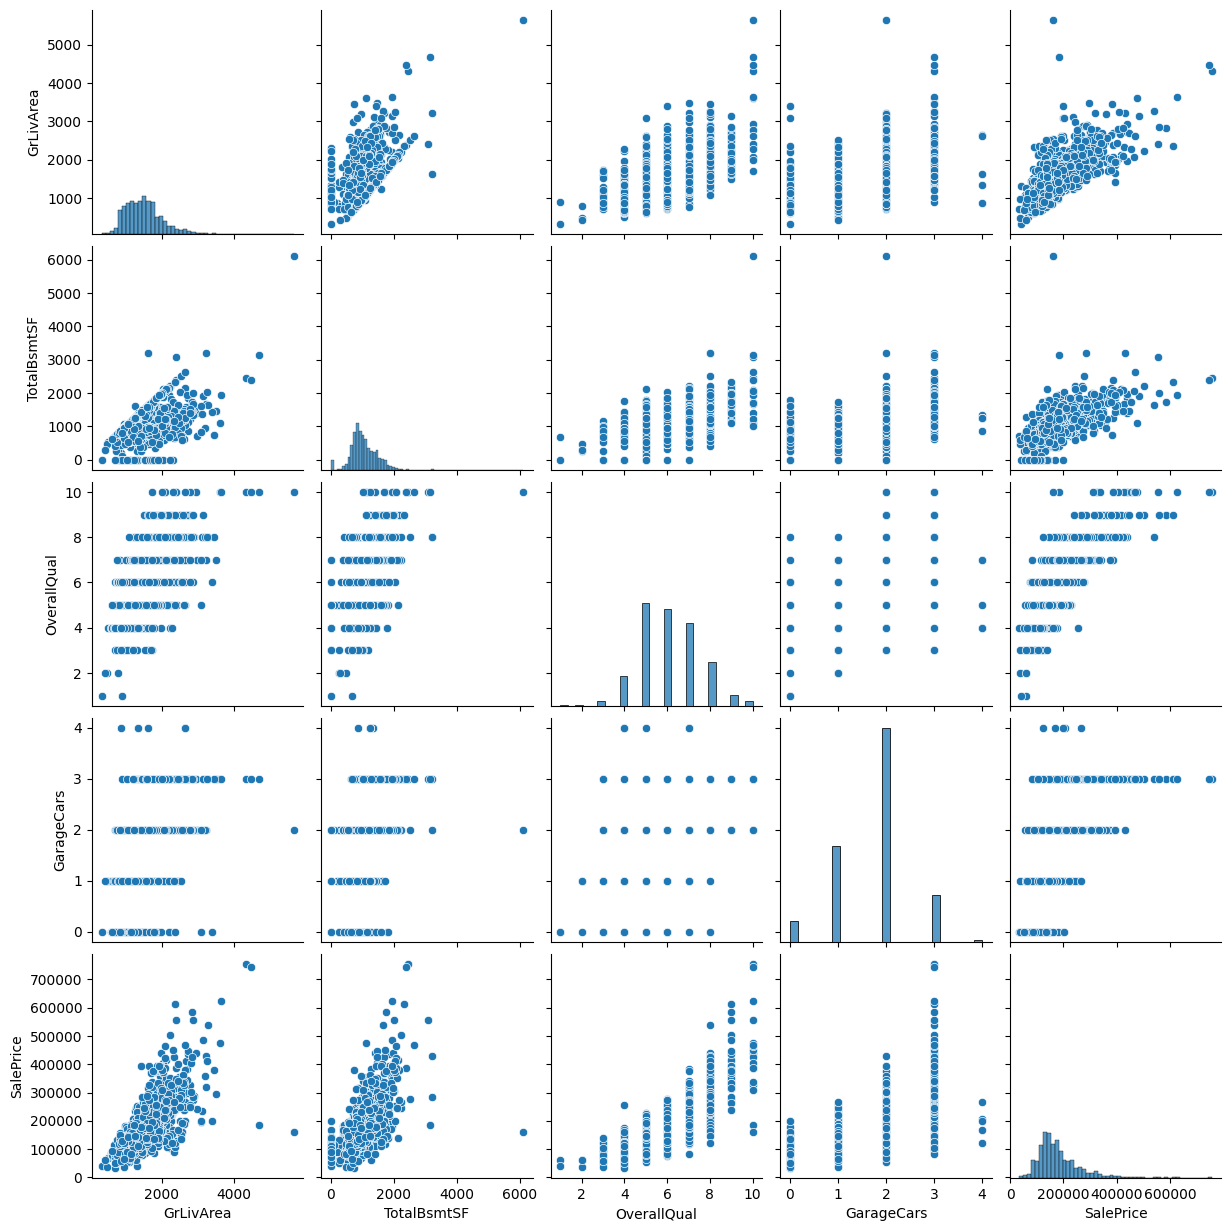

In [723]:
# 27
sns.pairplot(df[['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars', 'SalePrice']])
plt.show()

In [724]:
# 28
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
YrSold,0
SaleType,0
SaleCondition,0
SalePrice,0


In [725]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GrLivArea_z
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.370333
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,-0.482512
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.515013
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0.383659
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1.299326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,0.250402
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,1.061367
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,1.569647
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,-0.832788


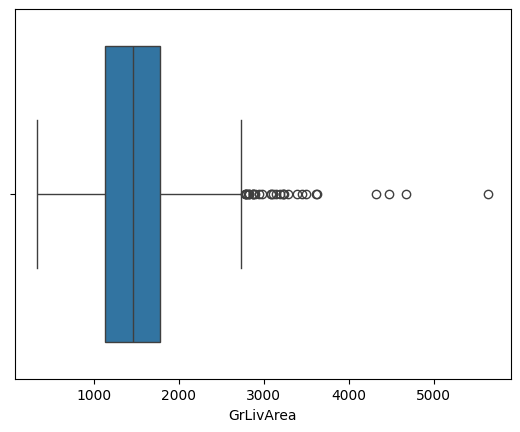

In [726]:
# 31
sns.boxplot(x=df['GrLivArea'])
plt.show()

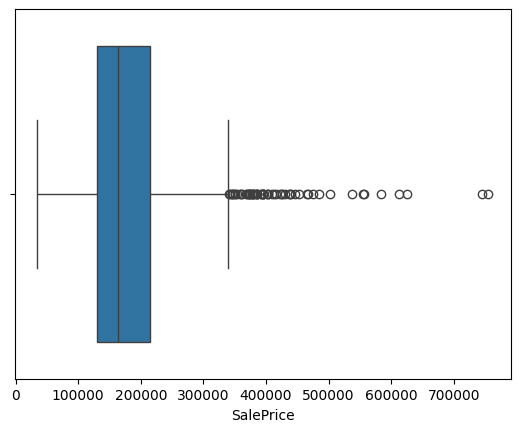

In [727]:
sns.boxplot(x=df['SalePrice'])
plt.show()

Этап 3:

In [728]:
df =  df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
        'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'Neighborhood', 'SalePrice']]


In [729]:
new_df = pd.get_dummies(df.drop(columns=['SalePrice']), columns=['Neighborhood'], drop_first=True).astype(int)

In [730]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(new_df)

In [731]:
x = scaled_data
y = df['SalePrice']

In [732]:
#33.Разбить данные на train/test (train_test_split, 80/25).
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [733]:
#34.Построить модель LinearRegression() из sklearn.linear_model.
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [734]:
#35.Обучить модель на тренировочных данных.
model.fit(x_train, y_train)

LinearRegression()

In [735]:
#36.Сделать предсказания на тесте.
y_pred = model.predict(x_test)

In [736]:
#37.Посчитать метрики:
#MAE, MSE, RMSE, R²

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}%')

MAE: 22855.51
MSE: 1303016114.06
RMSE: 36097.31
R²: 0.81%


In [737]:
#40.Сохранить модель (joblib или pickle).


In [738]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


random_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
xgb_model = XGBRegressor()

In [739]:
random_model.fit(x_train, y_train)

RandomForestRegressor()

In [740]:
gb_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [741]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [742]:
print('lr', model.score(x_test, y_test))
print('rf', random_model.score(x_test, y_test))
print('gb', gb_model.score(x_test, y_test))
print('xgb', xgb_model.score(x_test, y_test))
print(f'R²: {r2:.2f}')

lr 0.8088749225473082
rf 0.8544964442158135
gb 0.8676590983440872
xgb 0.8322899341583252
R²: 0.81


In [743]:
y_pred_log = model.predict(x_test)
y_pred_rf = random_model.predict(x_test)
y_pred_gb = gb_model.predict(x_test)
y_pred_xgb = xgb_model.predict(x_test)

In [744]:
from sklearn.metrics import r2_score

print('Logistic Regression:', r2_score(y_test, y_pred_log))
print('Random Forest:', r2_score(y_test, y_pred_rf))
print('GB:', r2_score(y_test, y_pred_gb))
print('XGB:', r2_score(y_test, y_pred_xgb))

Logistic Regression: 0.8088749225473082
Random Forest: 0.8544964442158135
GB: 0.8676590983440872
XGB: 0.8322899341583252


In [745]:
import joblib
joblib.dump(gb_model, 'model_gb.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [746]:
new_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,7,1710,2,548,856,856,2,2003,2003,8,...,0,0,0,0,0,0,0,0,0,0
1,6,1262,2,460,1262,1262,2,1976,1976,6,...,0,0,0,0,0,0,0,0,0,1
2,7,1786,2,608,920,920,2,2001,2002,6,...,0,0,0,0,0,0,0,0,0,0
3,7,1717,3,642,756,961,1,1915,1970,7,...,0,0,0,0,0,0,0,0,0,0
4,8,2198,3,836,1145,1145,2,2000,2000,9,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,1999,2000,7,...,0,0,0,0,0,0,0,0,0,0
1456,6,2073,2,500,1542,2073,2,1978,1988,7,...,0,0,0,0,0,0,0,0,0,0
1457,7,2340,1,252,1152,1188,2,1941,2006,9,...,0,0,0,0,0,0,0,0,0,0
1458,5,1078,1,240,1078,1078,1,1950,1996,5,...,0,0,0,0,0,0,0,0,0,0
